### Провести анализ, найти закономерности и сделать вывод

**Каждая строчка наборов данных содержит следующие поля:**

**Survived** — выжил данный пассажир или нет (0 для умерших, 1 для выживших)

**Pclass** — класс пассажира (1 — высший, 2 — средний, 3 — низший);

**Name** — имя;

**Sex** — пол;

**Age** — возраст;

**SibSp** — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

**Parch** — количество родителей, детей (в том числе приемных) на борту титаника;

**Ticket** — номер билета;

**Fare** — плата за проезд;

**Cabin** — каюта;

**Embarked** — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train (2).csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Обработка численных данных
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**count** - Общее кол-во не пустых строк

**mean** - среднее значение в столбце

**std** - стандартное отклонение от среднего значения

**min** - минимальное значение

**max** - максимальное значение

Числа **25%, 50%, 75%** - перцентили

***Перцентиль*** - это показатель, используемый в статистике, показывающий значение, ниже которого падает определенный процент наблюдений в группе наблюдений

In [9]:
# Отображение строковых данных
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- В основном на борту находились мужчины (577)
- По данной выбобрке можно увидеть, что билеты дублировались: Всего - 891, но уникальных - 681(Б.347082 был дублирован 7 раз)
- Каютами пользовались несколько раз (одну каюту занимали максимум 4 человека)
- Больше всего отбыло пассажиров из порта "S"(Саутгемптон)

In [5]:
# Проверить тип данных в столбцах
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Посмотреть есть ли у нас пустые значения
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 177 записей с пропущенным возрастом
- 687 записей с пропущенным значение каюты
- Отсутствуют 2 записи порта отправления

In [10]:
survived = df[df['Survived'] == 1]
dead = df[df['Survived'] == 0]

In [12]:
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [13]:
dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Каюты

In [14]:
# Разделение пассажиров по классам
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
# Отображение кол-ва выживших в каждом классе
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

**Можно увидеть, что большее кол-во выживших из 1-го класса(как неожиданно!)**

<AxesSubplot:xlabel='Survived', ylabel='count'>

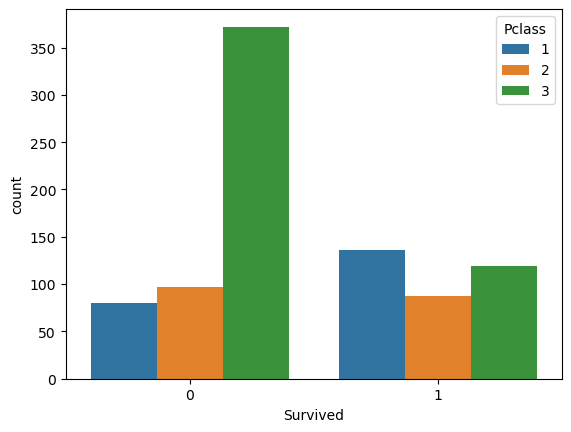

In [45]:
# Выживаемость по классам кают
sns.countplot(x='Survived', hue='Pclass', data=df)

## Пол

In [33]:
stat = pd.crosstab(df['Pclass'], df['Sex'])

In [24]:
stat

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


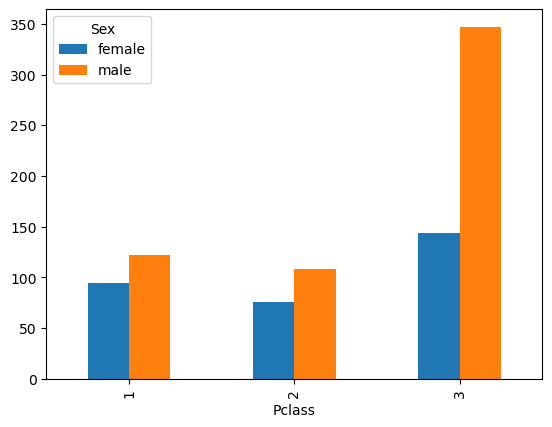

In [42]:
# Соотношение полов по классам кают
stat.plot(kind='bar')

<AxesSubplot:xlabel='Survived', ylabel='count'>

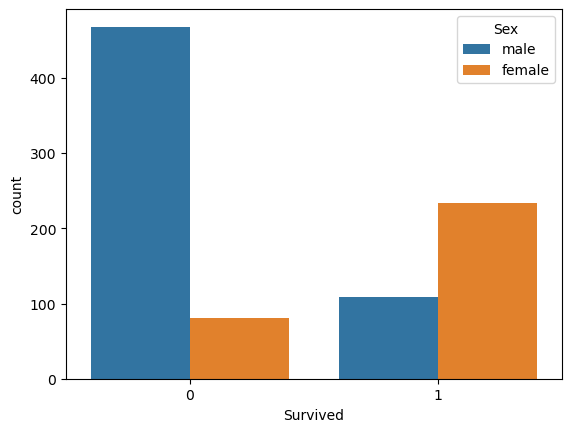

In [46]:
# Соотношение выживаемости от пола (женщин и детей сажаил в шлюпки первыми)
sns.countplot(x='Survived', hue='Sex', data=df)

## Возраст

In [75]:
df.sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [76]:
df['Age'].fillna(df['Age'].median()).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

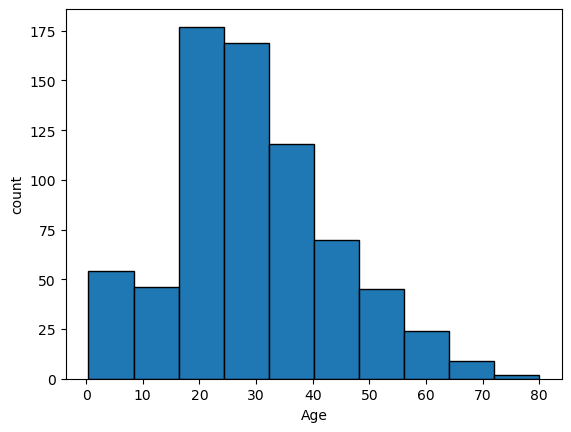

In [57]:
# Возраст пассажиров
plt.hist(df.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

C:\Users\smert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\smert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


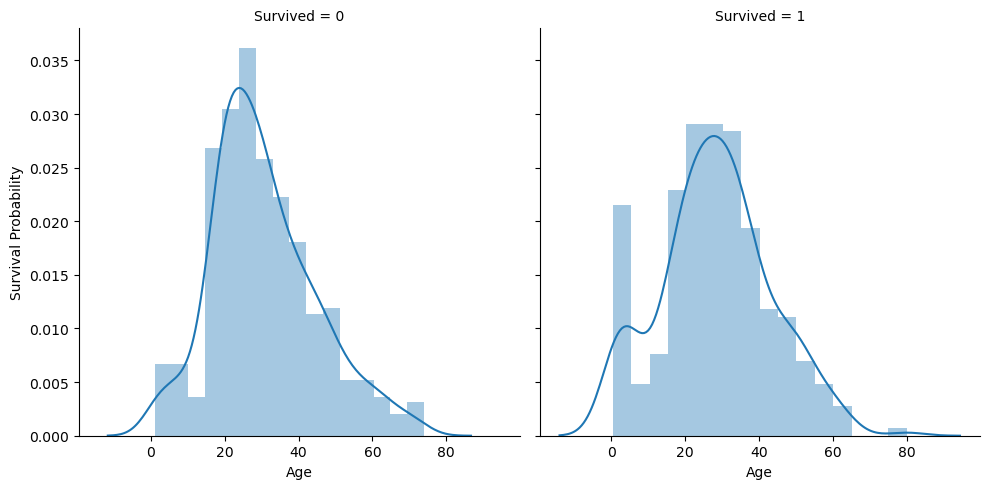

In [55]:
# Смотрим как зависит вероятность выживания от возраста
ageplot = sns.FacetGrid(df, col='Survived', height = 5)
ageplot = ageplot.map(sns.distplot, 'Age')
ageplot = ageplot.set_ylabels('Survival Probability')

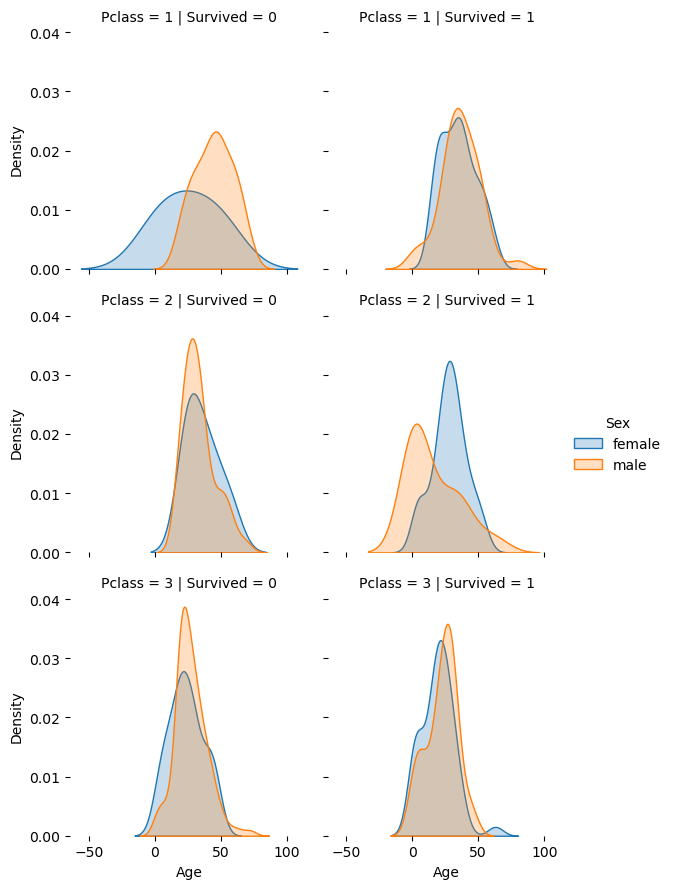

In [129]:
stat = sns.FacetGrid(df, col='Survived', row='Pclass', hue='Sex', height=3)
stat.map(sns.kdeplot, 'Age', shade=True).add_legend()
stat.despine(left=True, bottom=True)
plt.show()

## Родственники

In [77]:
# Посмотрим, сколько человек путешествовало с родственниками(в каком количестве)
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [83]:
# Распределим по выжившим (можно заметить, что чем больше родни - тем меньше шанс на выживание)
df.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

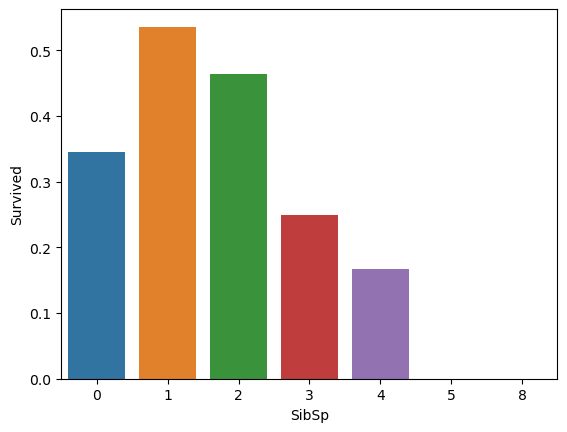

In [84]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=df)

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

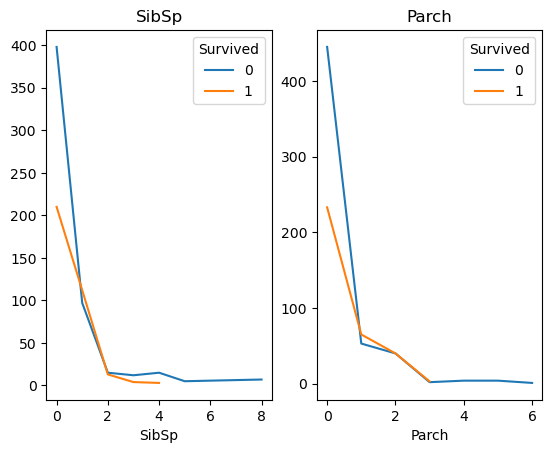

In [120]:
fig, axes = plt.subplots(ncols=2)
df.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
df.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

**По обоим графикам можно увидеть, что шанс выживания стремиться к нулю, в случае большого кол-ва SibSp или Parch**

In [79]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Билет

In [60]:
# Проверка билетов на дублирование
df_tickets = df.groupby('Ticket').size().reset_index().rename(columns={0:'count'})
df_tickets.sort_values(by='count',ascending=False)

,Ticket,count
80,1601,7
568,CA. 2343,7
333,347082,7
566,CA 2144,6
337,347088,6
...,...,...
300,345572,1
299,345364,1
298,343276,1
297,343275,1


In [73]:
# Проверим являются ли частодублированные билеты "счастливыми"
df[df['Ticket']=='1601'].sort_values('Survived', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S


In [64]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [65]:
df[df['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [92]:
df[['Ticket', 'Fare']]

,Ticket,Fare
258,PC 17755,512.3292
737,PC 17755,512.3292
679,PC 17755,512.3292
88,19950,263.0000
341,19950,263.0000
...,...,...
413,239853,0.0000
822,19972,0.0000
732,239855,0.0000
179,LINE,0.0000


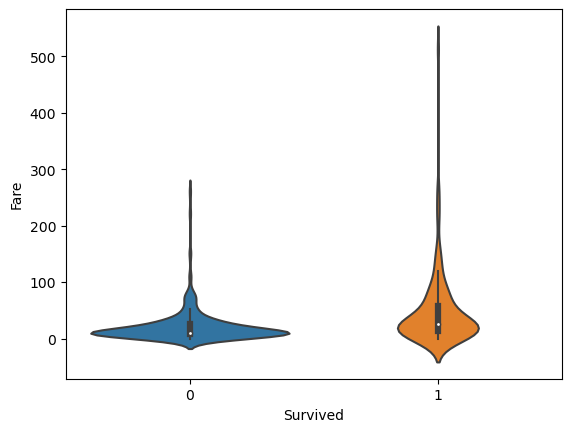

In [117]:
 # Цена VS Выживаемость
sns.violinplot(x='Survived', y='Fare', data=df)

plt.show()

## Порт отправки

In [121]:
# Отсортируем по портам(больше всего пассажиров из порта "S")
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\smert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


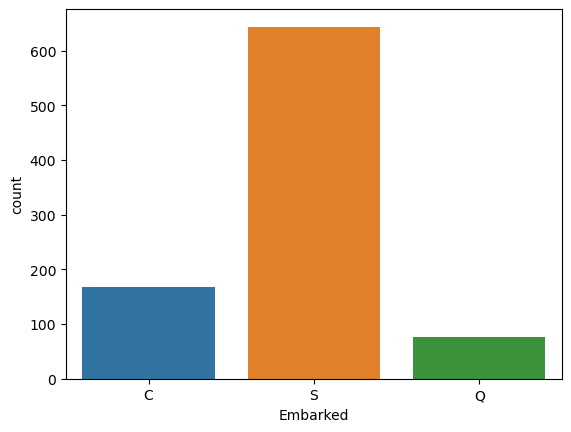

In [125]:
sns.countplot(df.Embarked)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

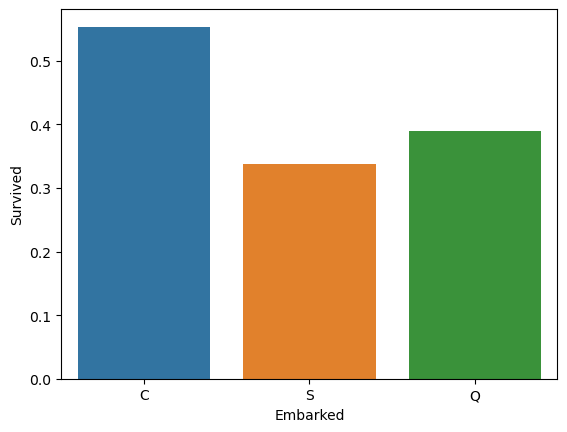

In [122]:
# Кол-во выживших распределенное по портам
sns.barplot(x='Embarked', y='Survived', data=df, ci=None)
